# Police Blotter Data Analysis

Importing Pandas and enabling use of graphs


In [2]:
import pandas as pd
data = pd.read_csv("policeBlotter.csv")
import matplotlib.pyplot as plt
%matplotlib inline

Grouping the data by the neighborhood name

In [3]:
data.groupby("INCIDENTNEIGHBORHOOD").count()


,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,
Allegheny Center,18,18,18,18,18,18,18,18,18,18,18,12,12,12,12
Allegheny West,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Allentown,44,44,44,44,44,44,44,44,44,44,44,41,41,41,41
Arlington,27,27,27,27,27,27,27,27,27,27,27,22,22,22,22
Arlington Heights,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,10,10,10,10,10,10,10,10,10,10,10,6,6,6,6
West End,17,17,17,17,17,17,17,17,17,17,17,15,15,16,16
West Oakland,44,44,44,44,44,44,44,44,44,44,44,32,32,32,32


This code creates a graph of each neighborhood and their amount of crimes

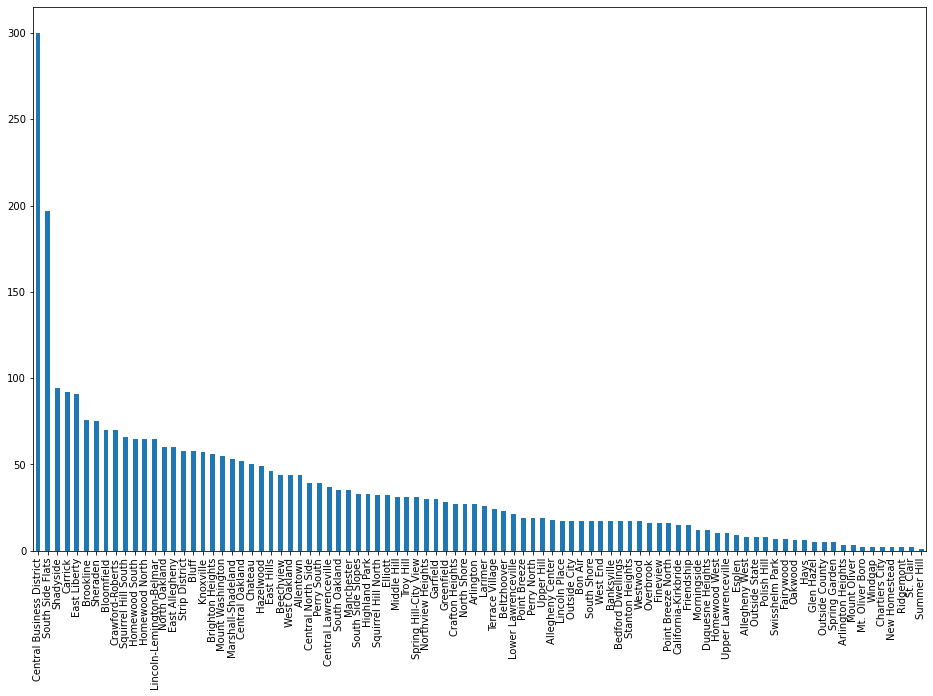

In [4]:
neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts()
plt.figure(figsize=(16, 10)) 
neighborhoods.plot(kind='bar')

plt.show()

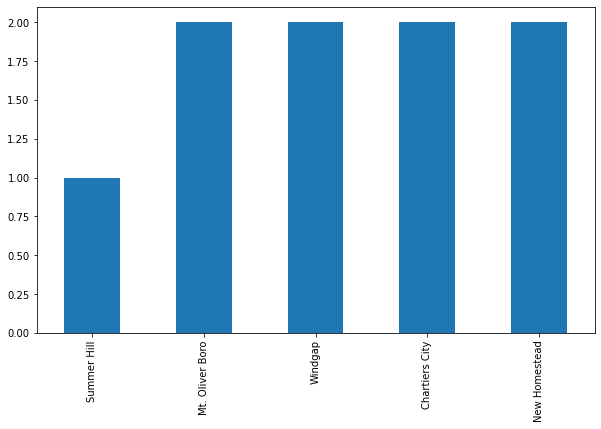

In [5]:
neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts()
bestNeighborhoods = neighborhoods.nsmallest(5)
plt.figure(figsize=(10, 6)) 
bestNeighborhoods.plot(kind='bar')

plt.show()



Merge Police Blotter data and 2015 census.
This enables us to see the amount of crimes in proportion to the population as well.

In [6]:
population = pd.read_csv('Pittsburgh_2015_census_data.csv')
neighborhoodsTwo = data.rename(columns = {'INCIDENTNEIGHBORHOOD': 'Neighborhood'})
mergedData = pd.merge(neighborhoodsTwo, population, on = 'Neighborhood')
mergedData.to_csv('merged_data.csv', index=False)

Read the merged data and display it after grouping by neighborhood. This gives us a dataset that has the offenses and population of each neighborhood


In [7]:

md = pd.read_csv("merged_data.csv", usecols = ['Neighborhood', 'Estimate; Total', 'OFFENSES'])
grouped_data = md.groupby('Neighborhood').agg({'OFFENSES': 'count', 'Estimate; Total': 'sum'}).reset_index()
grouped_data.head()

,Neighborhood,OFFENSES,Estimate; Total
0,Allegheny Center,18,25398.0
1,Allegheny West,8,2744.0
2,Allentown,44,112552.0
3,Arlington,27,50004.0
4,Arlington Heights,3,816.0


Next we will divide the amount of offenses of each neighborhood by the population to get a better understanding of the proportion of crime occuring.

In [14]:
grouped_data['Offenses/Population'] = grouped_data['OFFENSES'] / grouped_data['Estimate; Total']  
grouped_data.head()

,Neighborhood,OFFENSES,Estimate; Total,Population/Offenses,Offenses/Population
20,Chateau,50,150.0,0.333333,0.333333
66,South Shore,17,204.0,0.083333,0.083333
53,North Shore,27,5535.0,0.004878,0.004878
82,West End,17,3995.0,0.004255,0.004255
73,St. Clair,2,540.0,0.003704,0.003704


This code will make a graph in which it displays the neighborhoods and their proportion of crimes per person

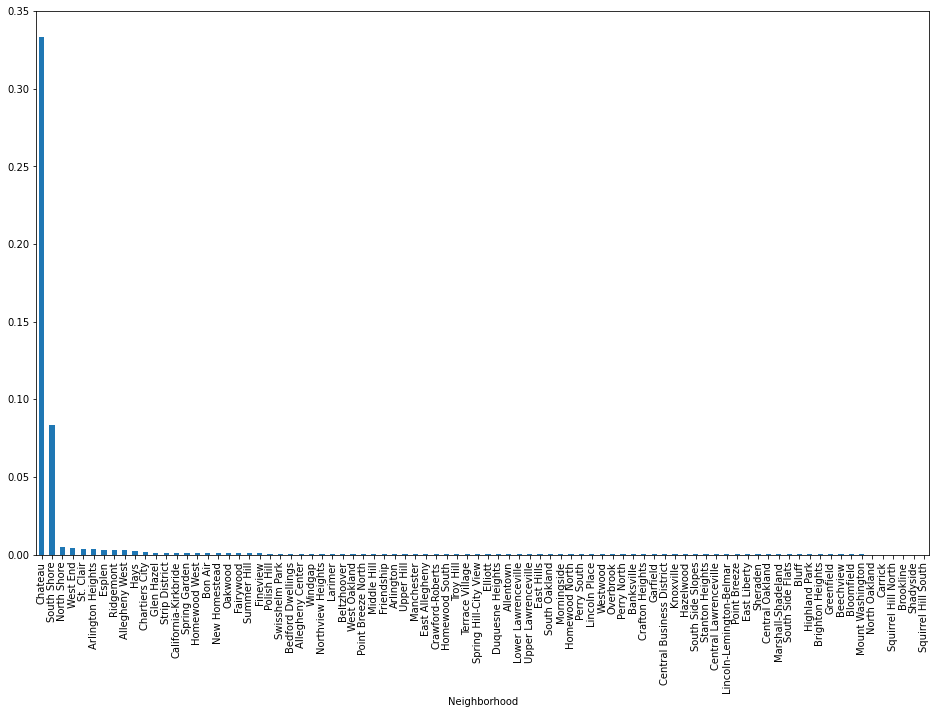

In [15]:
grouped_data = grouped_data.sort_values(by='Offenses/Population', ascending=False)
fig, ax = plt.subplots(figsize=(16, 10))
grouped_data.plot(x='Neighborhood', y='Offenses/Population', kind='bar', legend = False, ax = ax)
plt.show()

This new code will display the 5 neighborhoods with the lowest proportion of crime by population

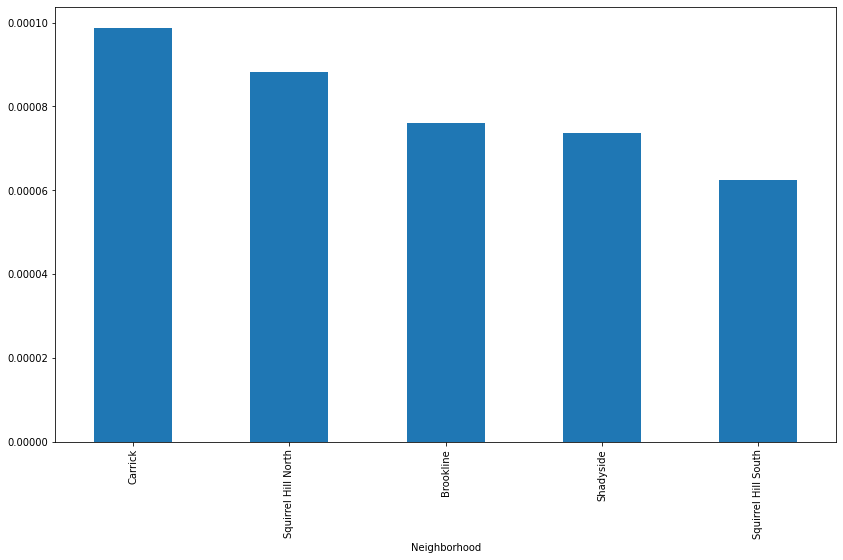

In [16]:
new_best_neighborhoods = grouped_data.tail(5)
fig, ax = plt.subplots(figsize=(14, 8))
new_best_neighborhoods.plot(x='Neighborhood', y='Offenses/Population', kind='bar', legend = False, ax = ax)
plt.show()

# Conclusion:

   In conclusion, the best(safest) neighborhood based off crime data would be Squirrel Hill South. This is evident because after merging the census data with the crime data the amount of offenses per person is lowest in Squirrel hill south. This was done by grouping all the police blotter data by neighborhood then combining both datasets off of neighborhood name. After that I divided the amount of offenses by the population of each neighborhood to get a crimes per person metric. This can be seen in the last two graphs. My personal best neighborhood would be shadyside as not only does it rank low on crimes per person, it also is a nice area with a good school nearby.